<a href="https://colab.research.google.com/github/tinemyumi/saude-mental-datasus/blob/main/eda-datasets/eda_inicial_SIHSUS_2022_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório**

**Integrantes**
- Larissa Yumi Tinem
- Leo Tsuchida Hoçoya

**Conteúdo**
- Tratamento de valores nulos
- Análise Exploratória dos dados
- Distribuição de variáveis categóricas e numéricas

**Histórico de alterações:**
- 15/10/2025 - Larissa Yumi Tinem - Análise inicial do dataset, tratamento de valores nulos, distribuição de variáveis categóricas e numéricas



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Análise Exploratória de Dados do SIH-SUS (2022 a 2024)**

Análise exploratória do conjunto de dados concatenados sobre os anos 2022 a 2024 dos dados do SIH-SUS.

Data: 15/10/2025 Autor: Larissa Yumi Tinem



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_excel('/content/drive/MyDrive/Dataframes/df_total.xlsx')

# **Análise inicial do dataset**
Nesta etapa, vamos inspecionar o conjunto de dados para entender sua estrutura geral, número de linhas e colunas, tipos de dados e a presença de valores ausentes.


## **Objetivo desta seção**
Entender a estrutura dos dados e identificar possíveis problemas como:
- **Valores ausentes**
- **Tipos de dados incorretos**
- **Distribuições não uniformes**



In [ ]:
# Mostra o nome de todas as colunas do Dataframe
df.columns

Index(['Unnamed: 0', 'UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'NASC', 'IDADE', 'SEXO',
       'RACA_COR', 'ESPEC', 'IDENT', 'MUNIC_RES', 'DIAG_PRINC', 'DIAG_SECUN',
       'CAR_INT', 'COBRANCA', 'MUNIC_MOV', 'CID_ASSO', 'CID_MORTE', 'COMPLEX',
       'DT_INTER', 'DT_SAIDA', 'QT_DIARIAS', 'DIAS_PERM', 'MORTE', 'ANO'],
      dtype='object')

In [ ]:
# Mostra o formato (número de linhas e colunas)
df.shape

(265752, 25)

In [ ]:
# Traz um resumo com os tipos de dados e contagens de valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265752 entries, 0 to 265751
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  265752 non-null  int64         
 1   UF_ZI       265752 non-null  int64         
 2   ANO_CMPT    265752 non-null  int64         
 3   MES_CMPT    265752 non-null  int64         
 4   NASC        265752 non-null  object        
 5   IDADE       265752 non-null  int64         
 6   SEXO        265752 non-null  object        
 7   RACA_COR    258074 non-null  object        
 8   ESPEC       265752 non-null  int64         
 9   IDENT       265752 non-null  object        
 10  MUNIC_RES   265752 non-null  int64         
 11  DIAG_PRINC  265752 non-null  object        
 12  DIAG_SECUN  265752 non-null  int64         
 13  CAR_INT     265752 non-null  int64         
 14  COBRANCA    265752 non-null  int64         
 15  MUNIC_MOV   265752 non-null  int64         
 16  CI

In [ ]:
# Conta quantos valores nulos existem em cada coluna.
df.isna().sum()


,0
Unnamed: 0,0
UF_ZI,0
ANO_CMPT,0
MES_CMPT,0
NASC,0
IDADE,0
SEXO,0
RACA_COR,7678
ESPEC,0
IDENT,0


# **Tratando valores nulos**

Conforme análise anterior, foi verificado um total de 7678 valores nulos na coluna RACA_COR. Vamos verificar a porcentagem dos registros nulos para essa coluna. Isso ajuda a avaliar a **completude do dado**, identificando se há necessidade de tratamento (como preenchimento, exclusão ou categorização dos valores faltantes).

### 📊 **Interpretação**
O resultado indica **qual proporção** dos registros não possuem informação sobre raça/cor.  
- Se o valor for **baixo (ex: < 5%)**, provavelmente pode ser ignorado.  
- Se for **alto (ex: > 20%)**, é um alerta de que os dados dessa variável podem estar **incompletos ou enviesados**, afetando análises que dependem dessa informação.


In [ ]:
porcentagem_nulos = df['RACA_COR'].isna().mean() * 100
print(f"{porcentagem_nulos:.2f}% dos registros têm raça/cor nula")


2.89% dos registros têm raça/cor nula


## **Distribuição de RACA_COR**

Aqui vamos verificar **quantos registros existem em cada categoria da coluna `RACA_COR`**, incluindo os valores ausentes.  
Isso nos ajuda a entender melhor a composição da população no dataset.

### 📊 **Interpretação**
- Os números mostram **quantos registros pertencem a cada categoria de raça/cor**.  
- O valor **NaN** representa os registros **com informação ausente**.  
- Essa análise é útil para decidir se vamos **preencher os nulos**, **excluí-los** ou tratá-los como uma categoria separada.


In [ ]:
df['RACA_COR'].value_counts(dropna=False)


,count
RACA_COR,
Branca,145922
Parda,85945
Preta,24694
NaN,7678
Amarela,1477
IndÃ­gena,36


## **Tratamento de valores nulos em RACA_COR**

Agora vamos **tratar os valores ausentes** na coluna `RACA_COR`.  
Substituímos os `NaN` por uma categoria chamada `'Ignorado'`, o que permite incluir esses registros nas análises sem perder informações.  
Isso é importante para manter a **integridade do dataset** e facilitar análises estatísticas e visualizações.


In [ ]:
df['RACA_COR'] = df['RACA_COR'].fillna('Ignorado')



In [ ]:
df['SEXO'] = df['SEXO'].replace('Ignorado', 'Feminino')



# **Salvando o dataframe tratado no Drive**

In [ ]:
df.to_csv('/content/drive/MyDrive/Dataframes/df_tratado')

# **Distribuição de Variáveis Categóricas**

Esse gráfico mostra a distribuição de variáveis categóricas (no caso, SEXO e RACA_COR). Foi possível verificar quantos registros há em cada categoria, facilitando a identificação de desbalanceamento ou tendência nos dados.

Além disso, o gráfico de boxplot mostra a distribuição da idade dos pacientes segundo a variável RACA_COR. Cada caixa representa 50% dos dados (do primeiro ao terceiro quartil), a linha dentro da caixa indica a mediana, e os pontos fora das linhas (“whiskers”) representam outliers, ou seja, idades atípicas.

## **Interpretação**

Essa análise ajuda a compreender o **perfil sociodemográfico** das internações por transtornos mentais, apontando se há predominância de algum sexo ou grupo racial.


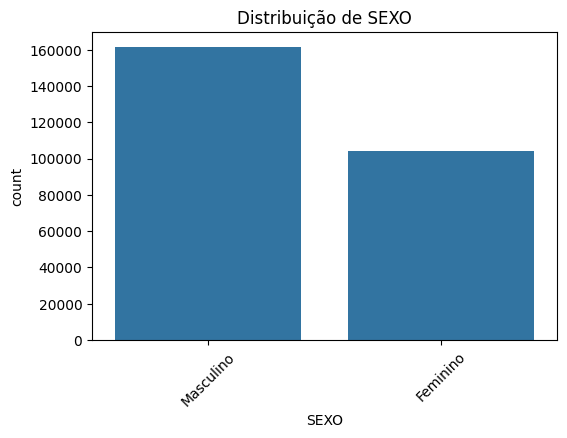

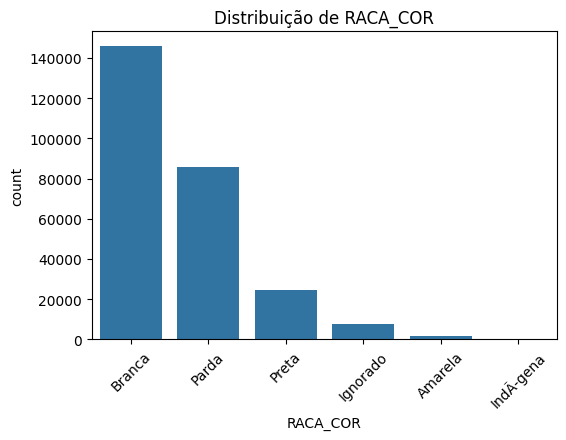

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categoricas = ['SEXO', 'RACA_COR']

for col in categoricas:
  plt.figure(figsize=(6,4))
  sns.countplot(x=col, data=df, order=df[col].value_counts().index)
  plt.title(f'Distribuição de {col}')
  plt.xticks(rotation=45)
  plt.show()


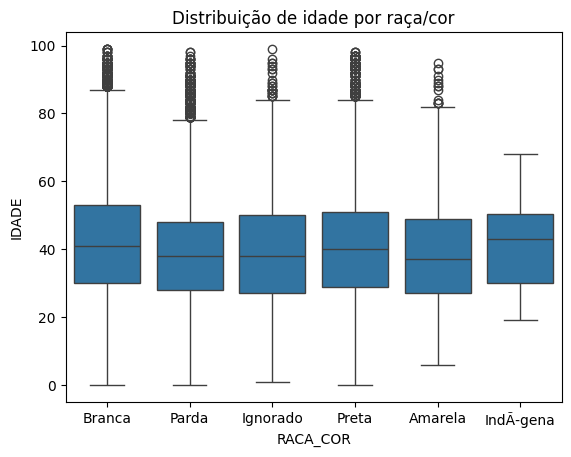

In [ ]:
sns.boxplot(x='RACA_COR', y='IDADE', data=df)
plt.title("Distribuição de idade por raça/cor")
plt.show()


# **Distribuição de Variáveis Numéricas**

Esses gráficos mostram a distribuição de variáveis numéricas (IDADE, QT_DIARIAS, DIAS_PERM). A curva azul representa a **distribuição de densidade (KDE)**, ajudando a visualizar a forma da distribuição (normal, assimétrica etc.).

Além dos gráficos, são apresentadas as **estatísticas descritivas** de cada variável, como média, mediana, valor mínimo e máximo, para uma análise mais completa do perfil dos pacientes.


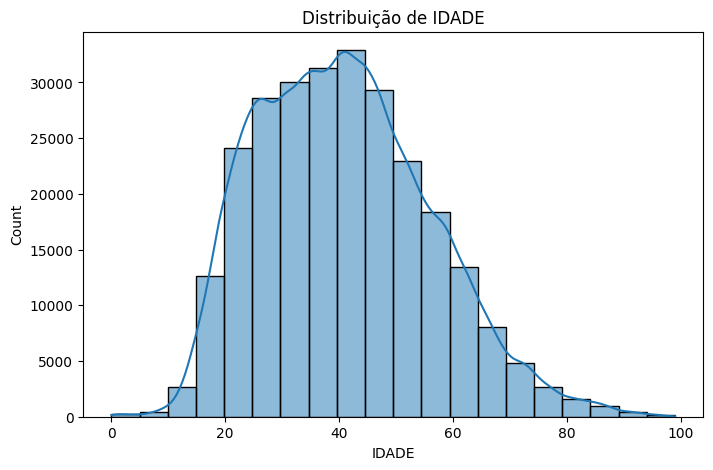

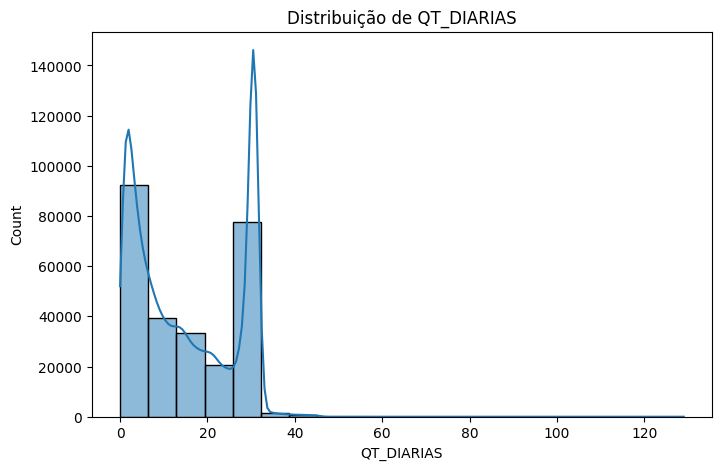

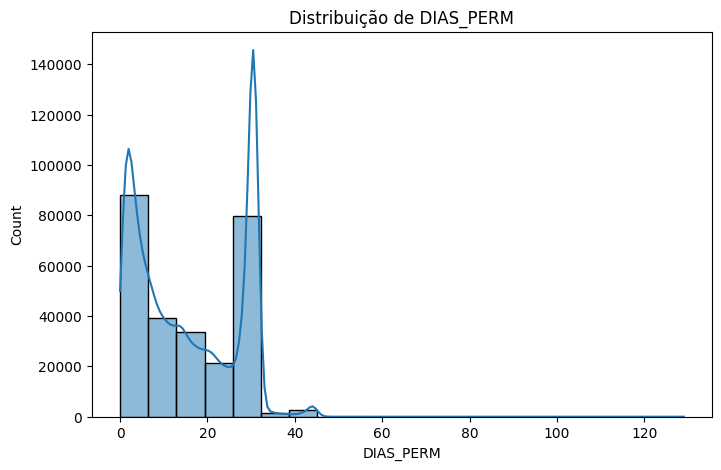

In [ ]:
numericas = ['IDADE', 'QT_DIARIAS', 'DIAS_PERM']

for col in numericas:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribuição de {col}")
    plt.show()


In [ ]:
df[numericas].describe()


,IDADE,QT_DIARIAS,DIAS_PERM
count,265752.000000,265752.000000,265752.000000
mean,40.896196,15.135269,15.661820
std,15.193893,11.559107,11.723521
min,0.000000,0.000000,0.000000
25%,29.000000,4.000000,4.000000
50%,40.000000,13.000000,14.000000
75%,51.000000,29.000000,29.000000
max,99.000000,129.000000,129.000000


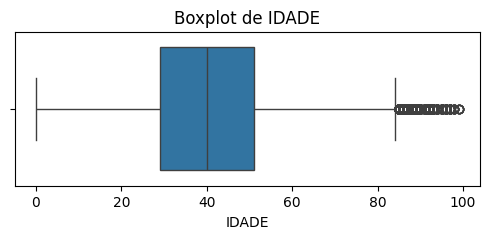

📦 Estatísticas de IDADE:
 - Q1 (25%): 29.0
 - Mediana (50%): 40.0
 - Q3 (75%): 51.0
 - IQR: 22.0
 - Número de outliers: 1491
➡️ Existem valores atípicos em IDADE, que podem precisar de atenção na análise.

------------------------------------------------------------



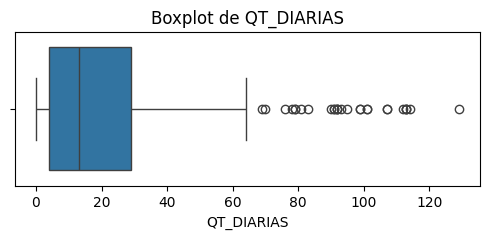

📦 Estatísticas de QT_DIARIAS:
 - Q1 (25%): 4.0
 - Mediana (50%): 13.0
 - Q3 (75%): 29.0
 - IQR: 25.0
 - Número de outliers: 28
➡️ Existem valores atípicos em QT_DIARIAS, que podem precisar de atenção na análise.

------------------------------------------------------------



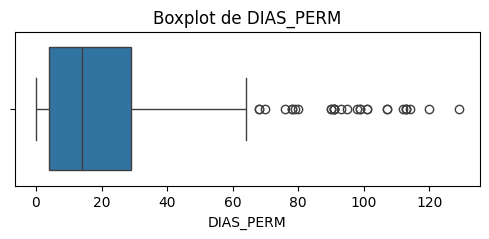

📦 Estatísticas de DIAS_PERM:
 - Q1 (25%): 4.0
 - Mediana (50%): 14.0
 - Q3 (75%): 29.0
 - IQR: 25.0
 - Número de outliers: 30
➡️ Existem valores atípicos em DIAS_PERM, que podem precisar de atenção na análise.

------------------------------------------------------------



In [ ]:
for col in numericas:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

    # Estatísticas do boxplot
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    n_outliers = outliers.shape[0]

    print(f"📦 Estatísticas de {col}:")
    print(f" - Q1 (25%): {Q1}")
    print(f" - Mediana (50%): {df[col].median()}")
    print(f" - Q3 (75%): {Q3}")
    print(f" - IQR: {IQR}")
    print(f" - Número de outliers: {n_outliers}")
    if n_outliers > 0:
        print(f"➡️ Existem valores atípicos em {col}, que podem precisar de atenção na análise.\n")
    else:
        print(f"➡️ Nenhum outlier detectado em {col}.\n")
    print("-"*60 + "\n")



# **TOP 10 Diagnósticos Principais**

O gráfico abaixo apresenta os **10 diagnósticos mais frequentes** entre as internações registradas.  
Ele ajuda a identificar quais **transtornos mentais** são mais comuns na base de dados e permite focar análises ou estratégias de saúde pública nesses casos.  

As barras representam o **número de internações** para cada diagnóstico, facilitando a visualização das categorias mais prevalentes.

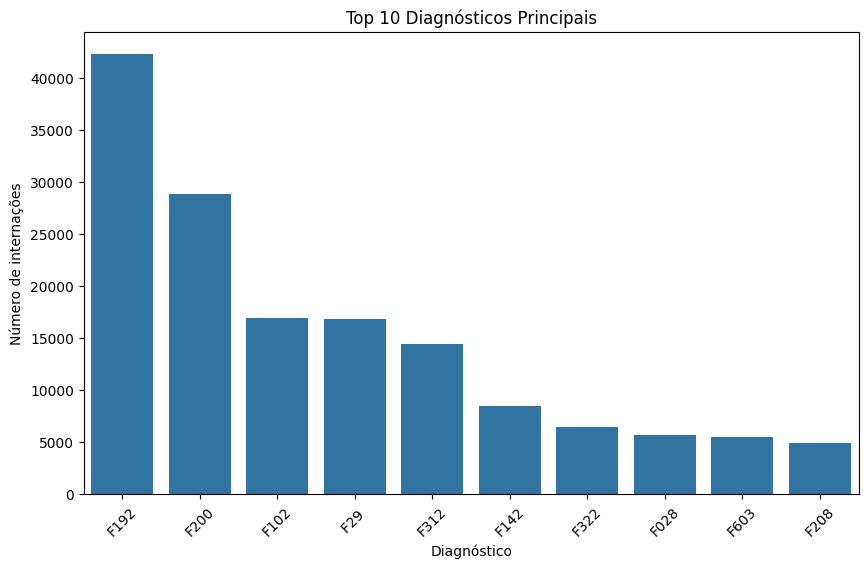

In [ ]:
top10 = df['DIAG_PRINC'].value_counts().nlargest(10).index
plt.figure(figsize=(10,6))
sns.countplot(x='DIAG_PRINC', data=df[df['DIAG_PRINC'].isin(top10)], order=top10)
plt.title('Top 10 Diagnósticos Principais')
plt.xlabel('Diagnóstico')
plt.ylabel('Número de internações')
plt.xticks(rotation=45)
plt.show()